# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [92]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

a = pd.read_excel('./train.xlsx')
g = pd.read_csv('./daily_csv.csv')

airfare = pd.DataFrame(a)
gas     = pd.DataFrame(g)


### I've selected the Airfare Prediction Dataset and a dataset of Natural Gas Prices (https://www.kaggle.com/tunguz/natural-gas-prices). I plan on combining these two datasets in order to find the relationship between gas prices and airfare rates, ultimately with the hope of using various attribues as a predictor of airfare rates. ###
More specifically, I hope to answer:
* How does airfare vary between different airlines?
* How does a trip's duration affect its price?
* How strong of a relationship is there between gas prices and airfare?


The airfare dataset provides various attributes related to a given flight, such as:
* Airline
* Flight duration
* Departure/Arrival locations
* Price
* etc.

The gas prices dataset is much simpler, offering only two attributes:
* Date
* Average natural gas price at each date


_note: The airfare and gas price datasets have different formatting for dates ("d/m/y" and "y-m-d," respectively), so I will need to refactor them to have the same formatting before merging the dataframes._
********

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

******

In [93]:
airfare

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649


Looking at the data, we see some columns that are unnecessary for our purposes, like `Source`, `Destination`, `Route`, `Arrival_Time`, and `Additional Info`. I'll get rid of them now...

In [94]:
# dropping unnecessary attributes
airfare = airfare.drop(['Source','Destination','Route','Arrival_Time','Additional Info'], axis=1)

airfare.describe(include='all')

,Airline,Date_of_Journey,Dep_Time,Duration,Total_Stops,Price
count,10683,10683,10683,10683,10682,10683.000000
unique,12,44,222,368,5,NaN
top,Jet Airways,18/05/2019,18:55,2h 50m,1 stop,NaN
freq,3849,504,233,550,5625,NaN
mean,NaN,NaN,NaN,NaN,NaN,9088.064121
std,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,1760.000000
25%,NaN,NaN,NaN,NaN,NaN,5278.000000
50%,NaN,NaN,NaN,NaN,NaN,8373.000000
75%,NaN,NaN,NaN,NaN,NaN,12374.000000


Now that we've removed some unnecessary data, we can get a better look at things. `Price` is the only continuous/numerical attribute; the others are all categorical, stored as strings. I will convert attributes like `Duration` and `Total_Stops` (which we may want to correlate with `Price`) into continuous data later. 

In [95]:
gas

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30


Clearly, the gas price dataset is much simpler. Let's take a look at some statistics about the `Gas_Price` attribute:

In [96]:
gas.describe()

,Price
count,5952.000000
mean,4.184644
std,2.190361
min,1.050000
25%,2.650000
50%,3.530000
75%,5.240000
max,18.480000


*****

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

*****
`Airline` is a categorical value; above, we saw above that `Airline` has 12 distinct values. Let's see which ones appear most:

<AxesSubplot:>

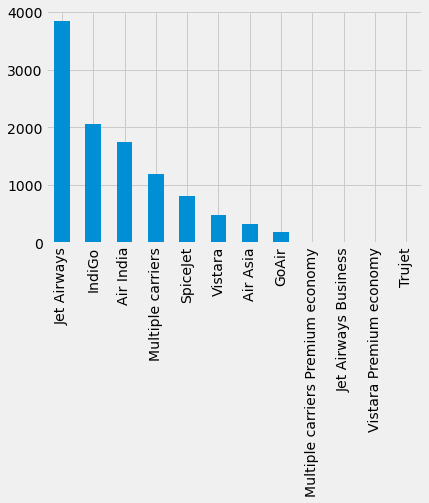

In [97]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

airfare['Airline'].value_counts().plot(kind='bar')


The majority of flights were clearly Jet Airways, IndiGo, and Air India. The rest of the flights were either fulfilled by multiple carriers or by single carriers with far lower traffic.

Next, let's check the flights' number of stops:

In [98]:
airfare['Stops'].value_counts().plot(kind='bar')

KeyError: 'Stops'

The overwhelming majority of flights are either non-stop or have a single stop. Later, we'll see if there's a significant difference between the airfare of these different types of flights.

Of the remaining data, the most relevant attributes are gas and airfare prices and the flights duration. Each of these variables is continuous, but we need to mess with the data before we can further analyze it.
*****

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

*****
__First, I need to convert some categorical data into quantitative values in order to find correlation between these attributes and airfare price. Then, I'll reformat the _date_ attribute in each dataframe to match, since I will be merging the dataframes on this attribute. As far as the merge goes, I will use a left outer join, since the airfare dataset (left dataframe) has muliple values of each date, and the gas dataset (right) has only one value per date.__

In [ ]:
# converting flight durations to datetime format

import re

durations           = airfare['Duration']
formatted_durations = []

# parsing duration strings and creating datetime objects
for duration in durations:
    if 'h' in duration:
        hr, min = duration.split('h')
        min = re.sub('[ m]', '', min)
    else:
        min = duration.split('m')[0]
       
    if hr and min:
        t = timedelta(hours=int(hr), minutes=int(min))
    elif not hr:
        t = timedelta(minutes=int(min))
    elif not min:
        t = timedelta(hours=int(hr))

    formatted_durations.append(t.total_seconds()/3600)

# replacing duration string with datetime objects
airfare.drop('Duration', axis=1)
airfare['Duration'] = formatted_durations
    

In [ ]:
# converting # of stops to ints

total_stops = airfare['Total_Stops']
num_stops   = []

for value in total_stops:
    if value == 'non-stop':
        num_stops.append(0)
    elif value != value: # checks for NaN
        num_stops.append(None)
    else:
        number = int(value.split(' stop')[0])
        num_stops.append(number)

# replacing string values with int values
airfare.drop('Total_Stops', axis=1)
airfare['Stops'] = num_stops

airfare

,Airline,Date_of_Journey,Dep_Time,Duration,Total_Stops,Price,Stops
0,IndiGo,24/03/2019,22:20,2.833333,non-stop,3898,0.0
1,Air India,1/05/2019,05:50,7.416667,2 stops,7663,2.0
2,Jet Airways,9/06/2019,09:25,19.000000,2 stops,13883,2.0
3,IndiGo,12/05/2019,18:05,5.416667,1 stop,6219,1.0
4,IndiGo,01/03/2019,16:50,4.750000,1 stop,13303,1.0
...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,19:55,2.500000,non-stop,4108,0.0
10679,Air India,27/04/2019,20:45,2.583333,non-stop,4146,0.0
10680,Jet Airways,27/04/2019,08:20,3.000000,non-stop,7230,0.0
10681,Vistara,01/03/2019,11:30,2.666667,non-stop,12649,0.0


In [ ]:
# formatting dates for airfare df
dates1 = airfare['Date_of_Journey']
formatted_dates1 = []

for flight_date in dates1.values:
    day, month, year = flight_date.split('/')
    day, month, year = int(day), int(month), int(year)
    formatted_dates1.append(date(year, month, day))

# formatting dates for gas df
dates2 = gas['Date']
formatted_dates2 = []

for flight_date in dates2.values:
    year, month, day = flight_date.split('-')
    year, month, day = int(year), int(month), int(day)
    formatted_dates2.append(date(year, month, day))


# formatting date column of each dataframe to match
airfare = airfare.drop('Date_of_Journey', axis=1)
gas = gas.drop('Date', axis=1)

airfare['Date'] = formatted_dates1
gas['Date'] = formatted_dates2

airfare.rename(columns = {'Price':'Airfare_Price'}, inplace = True)
gas.rename(columns = {'Price':'Gas_Price'}, inplace = True)

airfare_fuel = airfare.merge(gas, how='left', on='Date')

airfare_fuel

,Airline,Dep_Time,Duration,Total_Stops,Airfare_Price,Stops,Date,Gas_Price
0,IndiGo,22:20,2.833333,non-stop,3898,0.0,2019-03-24,NaN
1,Air India,05:50,7.416667,2 stops,7663,2.0,2019-05-01,2.59
2,Jet Airways,09:25,19.000000,2 stops,13883,2.0,2019-06-09,NaN
3,IndiGo,18:05,5.416667,1 stop,6219,1.0,2019-05-12,NaN
4,IndiGo,16:50,4.750000,1 stop,13303,1.0,2019-03-01,3.19
...,...,...,...,...,...,...,...,...
10678,Air Asia,19:55,2.500000,non-stop,4108,0.0,2019-04-09,2.71
10679,Air India,20:45,2.583333,non-stop,4146,0.0,2019-04-27,NaN
10680,Jet Airways,08:20,3.000000,non-stop,7230,0.0,2019-04-27,NaN
10681,Vistara,11:30,2.666667,non-stop,12649,0.0,2019-03-01,3.19


*****

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

*****

<AxesSubplot:>

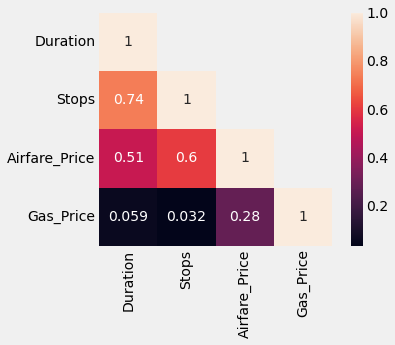

In [ ]:
import seaborn as sb

corr = airfare_fuel[['Duration','Stops','Airfare_Price','Gas_Price']].corr()

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

sb.heatmap(corr, mask=mask, square=True, annot=True)

First, let's visualize the relationship between flight duration and airfare:

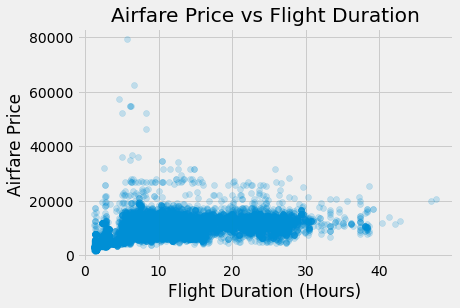

In [ ]:
x = airfare_fuel['Duration'].tolist()
y = airfare_fuel['Airfare_Price'].tolist()

plt.scatter(x, y, alpha=.2)
plt.title('Airfare Price vs Flight Duration')
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Airfare Price')
plt.show()

Looking at the graph, there appears to be little correlation between flight duration and price overall. Flights with extremely short durations are associated with the lowest airfare prices, but above about 5 hours in duration, the plot flattens out, suggesting that we cannot expect a significant difference in airfare price between a 10 hour and a 40 hour flight.

Next, let's examine the relationship between number of stops and airfare price. Since the number of stops a flight has is a discrete count, we should treat `Stops` as a categorical value; one easy way to visualize this relationship is with a box plot:

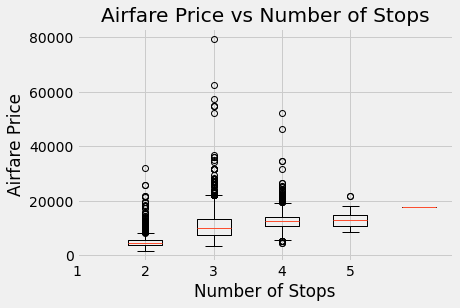

In [ ]:
y0 = airfare_fuel[airfare_fuel['Stops'] == 0]['Airfare_Price'].tolist()
y1 = airfare_fuel[airfare_fuel['Stops'] == 1]['Airfare_Price'].tolist()
y2 = airfare_fuel[airfare_fuel['Stops'] == 2]['Airfare_Price'].tolist()
y3 = airfare_fuel[airfare_fuel['Stops'] == 3]['Airfare_Price'].tolist()
y4 = airfare_fuel[airfare_fuel['Stops'] == 4]['Airfare_Price'].tolist()

y = [y0,y1,y2,y3,y4]

plt.boxplot(y)
plt.title('Airfare Price vs Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Airfare Price')
plt.xticks([0,1,2,3,4])
plt.show()

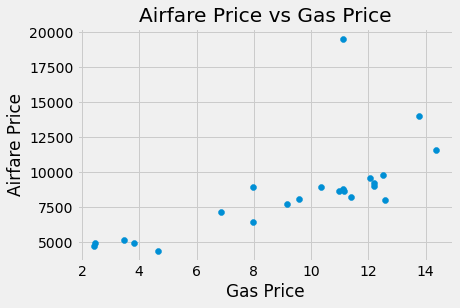

In [ ]:
avg_gas_prices = airfare_fuel.groupby('Gas_Price').mean()
x = avg_gas_prices.iloc[:, 0]
y = avg_gas_prices['Airfare_Price'].tolist()

plt.scatter(x, y)
plt.title('Airfare Price vs Gas Price')
plt.xlabel('Gas Price')
plt.ylabel('Airfare Price')
plt.show()

With the exception of a large outlier, there appears to be a relatively strong correlation between gas price and airfare price. It's worth noting that the airfare data was all gathered within about a six month range. In such a short amount of time, it would be difficult for airfare rates to fully reflect changes in gas prices. Over a larger period of time, it is likely that gas price would have a stronger affect on airfare prices. With a promising initial correlation, we should gather more data and further explore this relationship over a longer time period.